### Task 7: Root System Architecture (RSA) Extraction

Victoria Vicheva 233182

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage.morphology import skeletonize
from skimage.morphology import remove_small_objects
from skan import Skeleton, summarize
from skan.csr import skeleton_to_csgraph

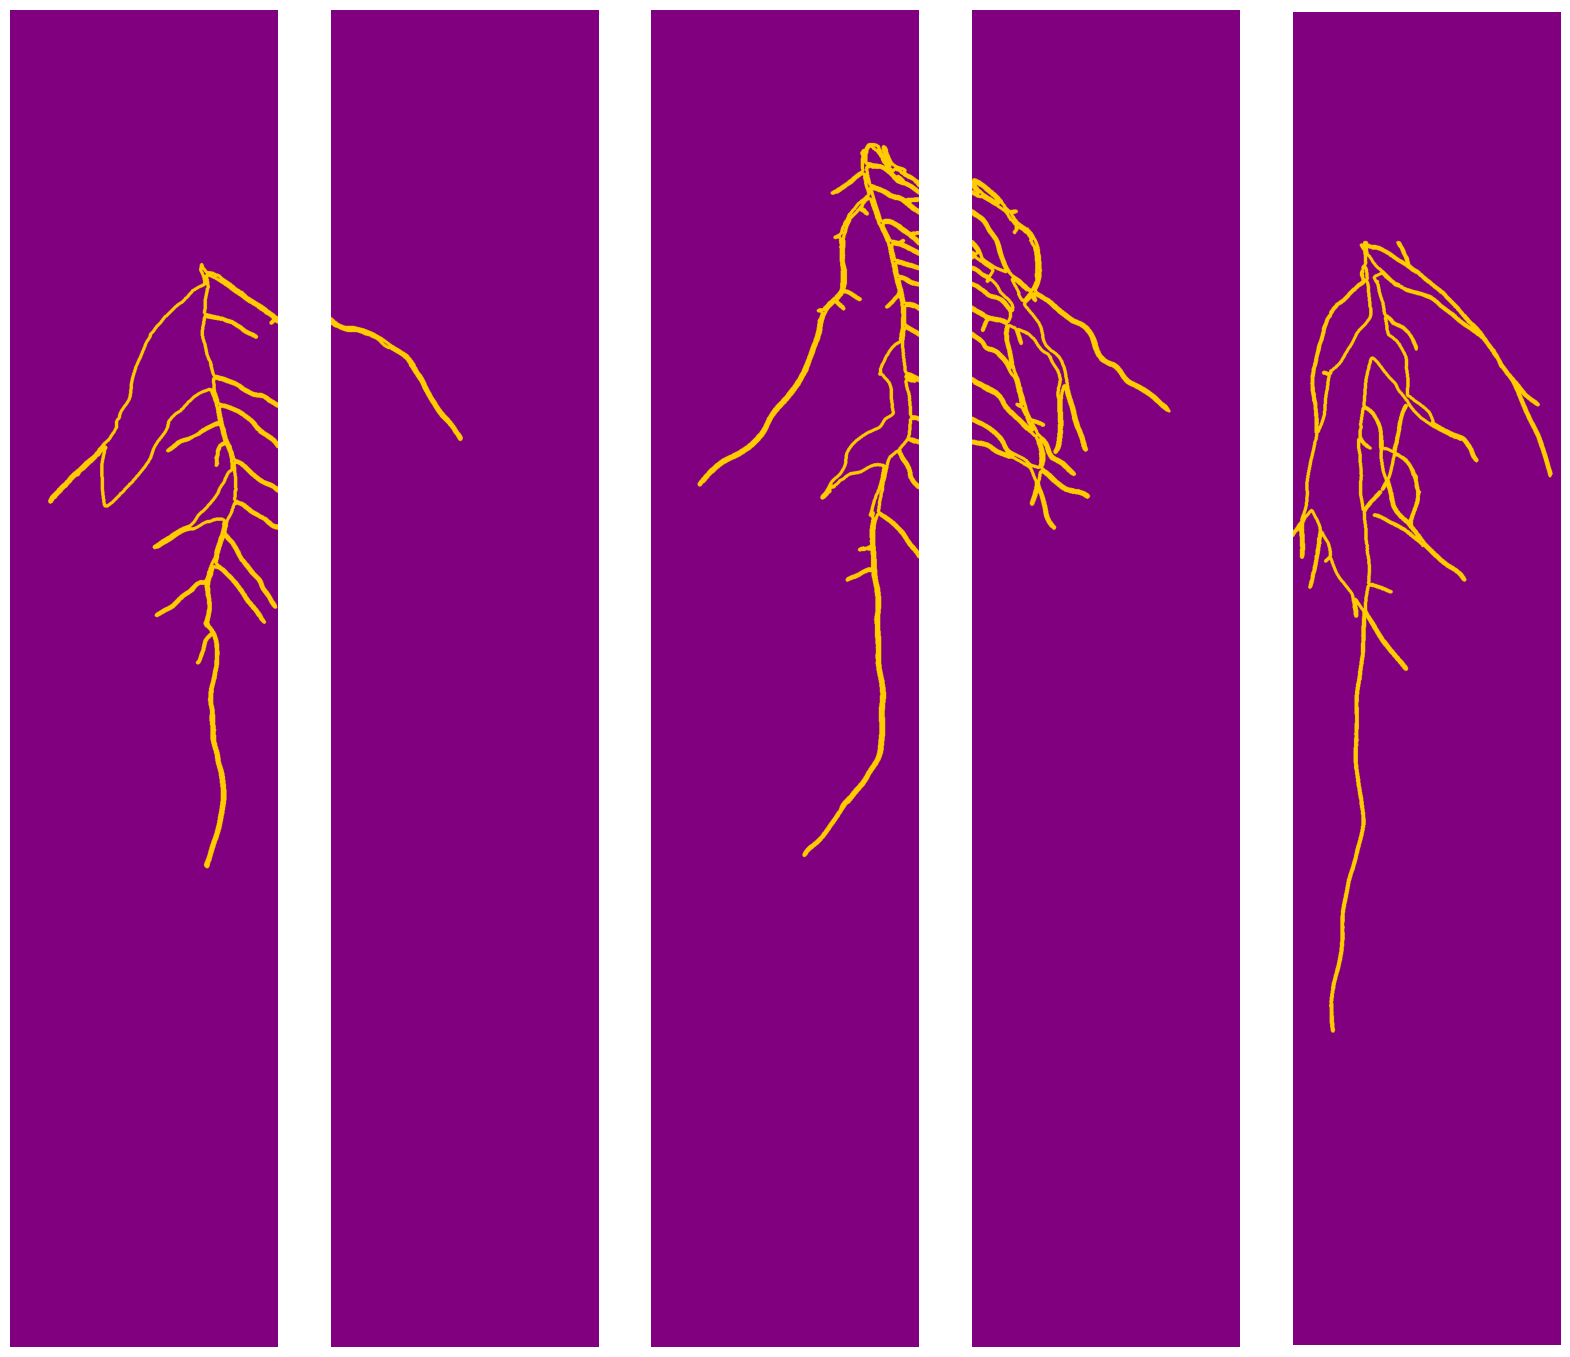

In [2]:
# defining the paths to the images
def load_and_plot_images(image_paths):
    # loading the images
    images = [Image.open(path) for path in image_paths]

    # plotting the images next to each other
    fig, axes = plt.subplots(1, len(images), figsize=(20, 20))
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

    return images

#defininf the paths to the images
image_paths = [
    'D:\\YearTwoAI\\Block B\\2024-25b-fai2-adsai-VictoriaVicheva233182\\datalab_tasks\\task 6\\split_1_processed.png',
    'D:\\YearTwoAI\\Block B\\2024-25b-fai2-adsai-VictoriaVicheva233182\\datalab_tasks\\task 6\\split_2_processed.png',
    'D:\\YearTwoAI\\Block B\\2024-25b-fai2-adsai-VictoriaVicheva233182\\datalab_tasks\\task 6\\split_3_processed.png',
    'D:\\YearTwoAI\\Block B\\2024-25b-fai2-adsai-VictoriaVicheva233182\\datalab_tasks\\task 6\\split_4_processed.png',
    'D:\\YearTwoAI\\Block B\\2024-25b-fai2-adsai-VictoriaVicheva233182\\datalab_tasks\\task 6\\split_5_processed.png'
]

# calling function
images = load_and_plot_images(image_paths)

Skeletonize the image - function:

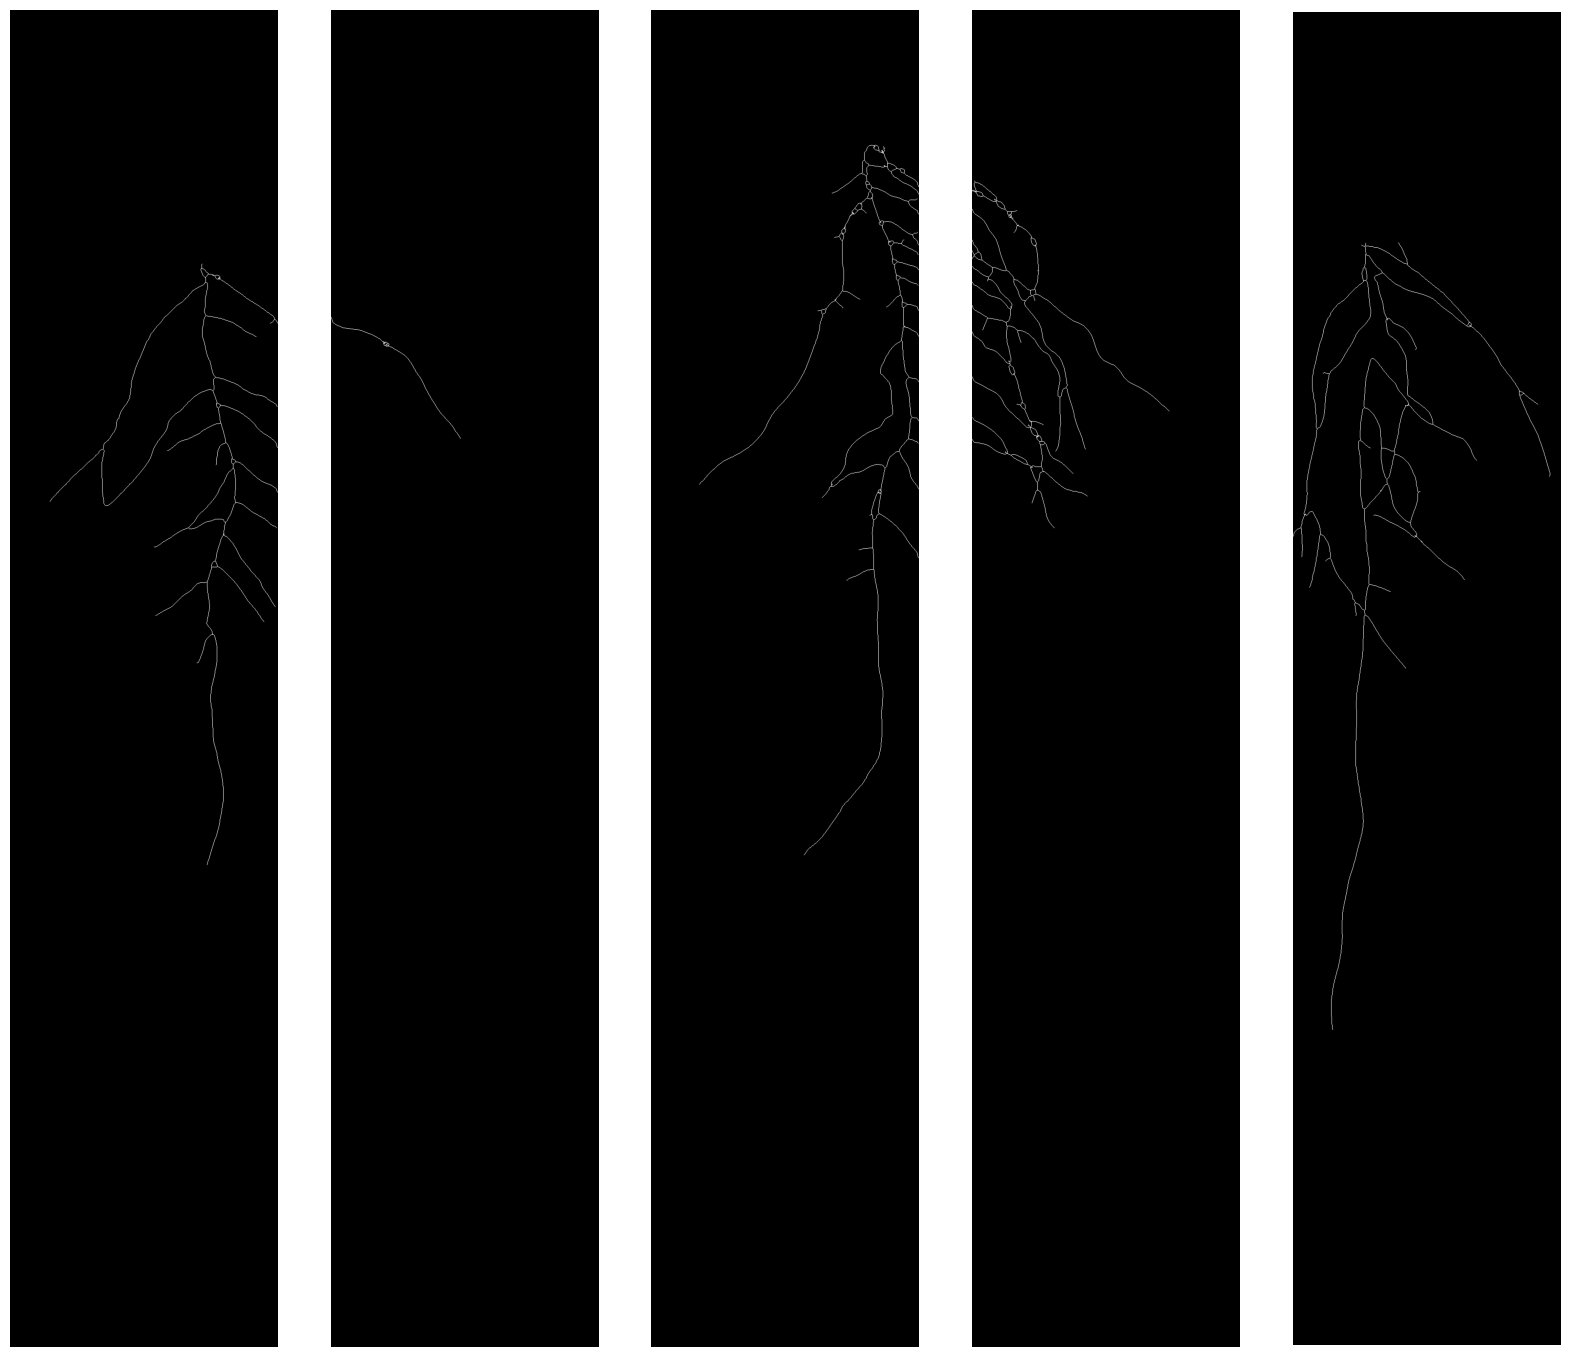

In [3]:
# function to skeletonize the images 
def process_and_skeletonize_images(images):
    # converting images to grayscale and then to binary
    binary_images = [cv2.threshold(cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY), 127, 255, cv2.THRESH_BINARY)[1] for img in images]

    # skeletonizing the binary images
    skeletonized_images = [skeletonize(img // 255) for img in binary_images]

    # plotting the skeletonized images
    fig, axes = plt.subplots(1, len(skeletonized_images), figsize=(20, 20))
    for ax, skel_img in zip(axes, skeletonized_images):
        ax.imshow(skel_img, cmap='gray')
        ax.axis('off')
    plt.show()

    return skeletonized_images

# calling the function
skeletonized_images = process_and_skeletonize_images(images)

In [4]:
from skan import csr
def skeleton_to_graph_info(skeletonized_images):

    # converting skeletonized images to graphs
    graphs = [csr.skeleton_to_csgraph(skel_img) for skel_img in skeletonized_images]

    # printing the graph information
    for i, (graph, coordinates) in enumerate(graphs):
        print(f"Graph {i+1}:")
        print(f"  Number of nodes: {graph.shape[0]}")
        print(f"  Number of edges: {graph.nnz}")

    return graphs

# calling the function
graphs = skeleton_to_graph_info(skeletonized_images)


Graph 1:
  Number of nodes: 3767
  Number of edges: 7548
Graph 2:
  Number of nodes: 364
  Number of edges: 730
Graph 3:
  Number of nodes: 4179
  Number of edges: 8414
Graph 4:
  Number of nodes: 3507
  Number of edges: 7066
Graph 5:
  Number of nodes: 5372
  Number of edges: 10772


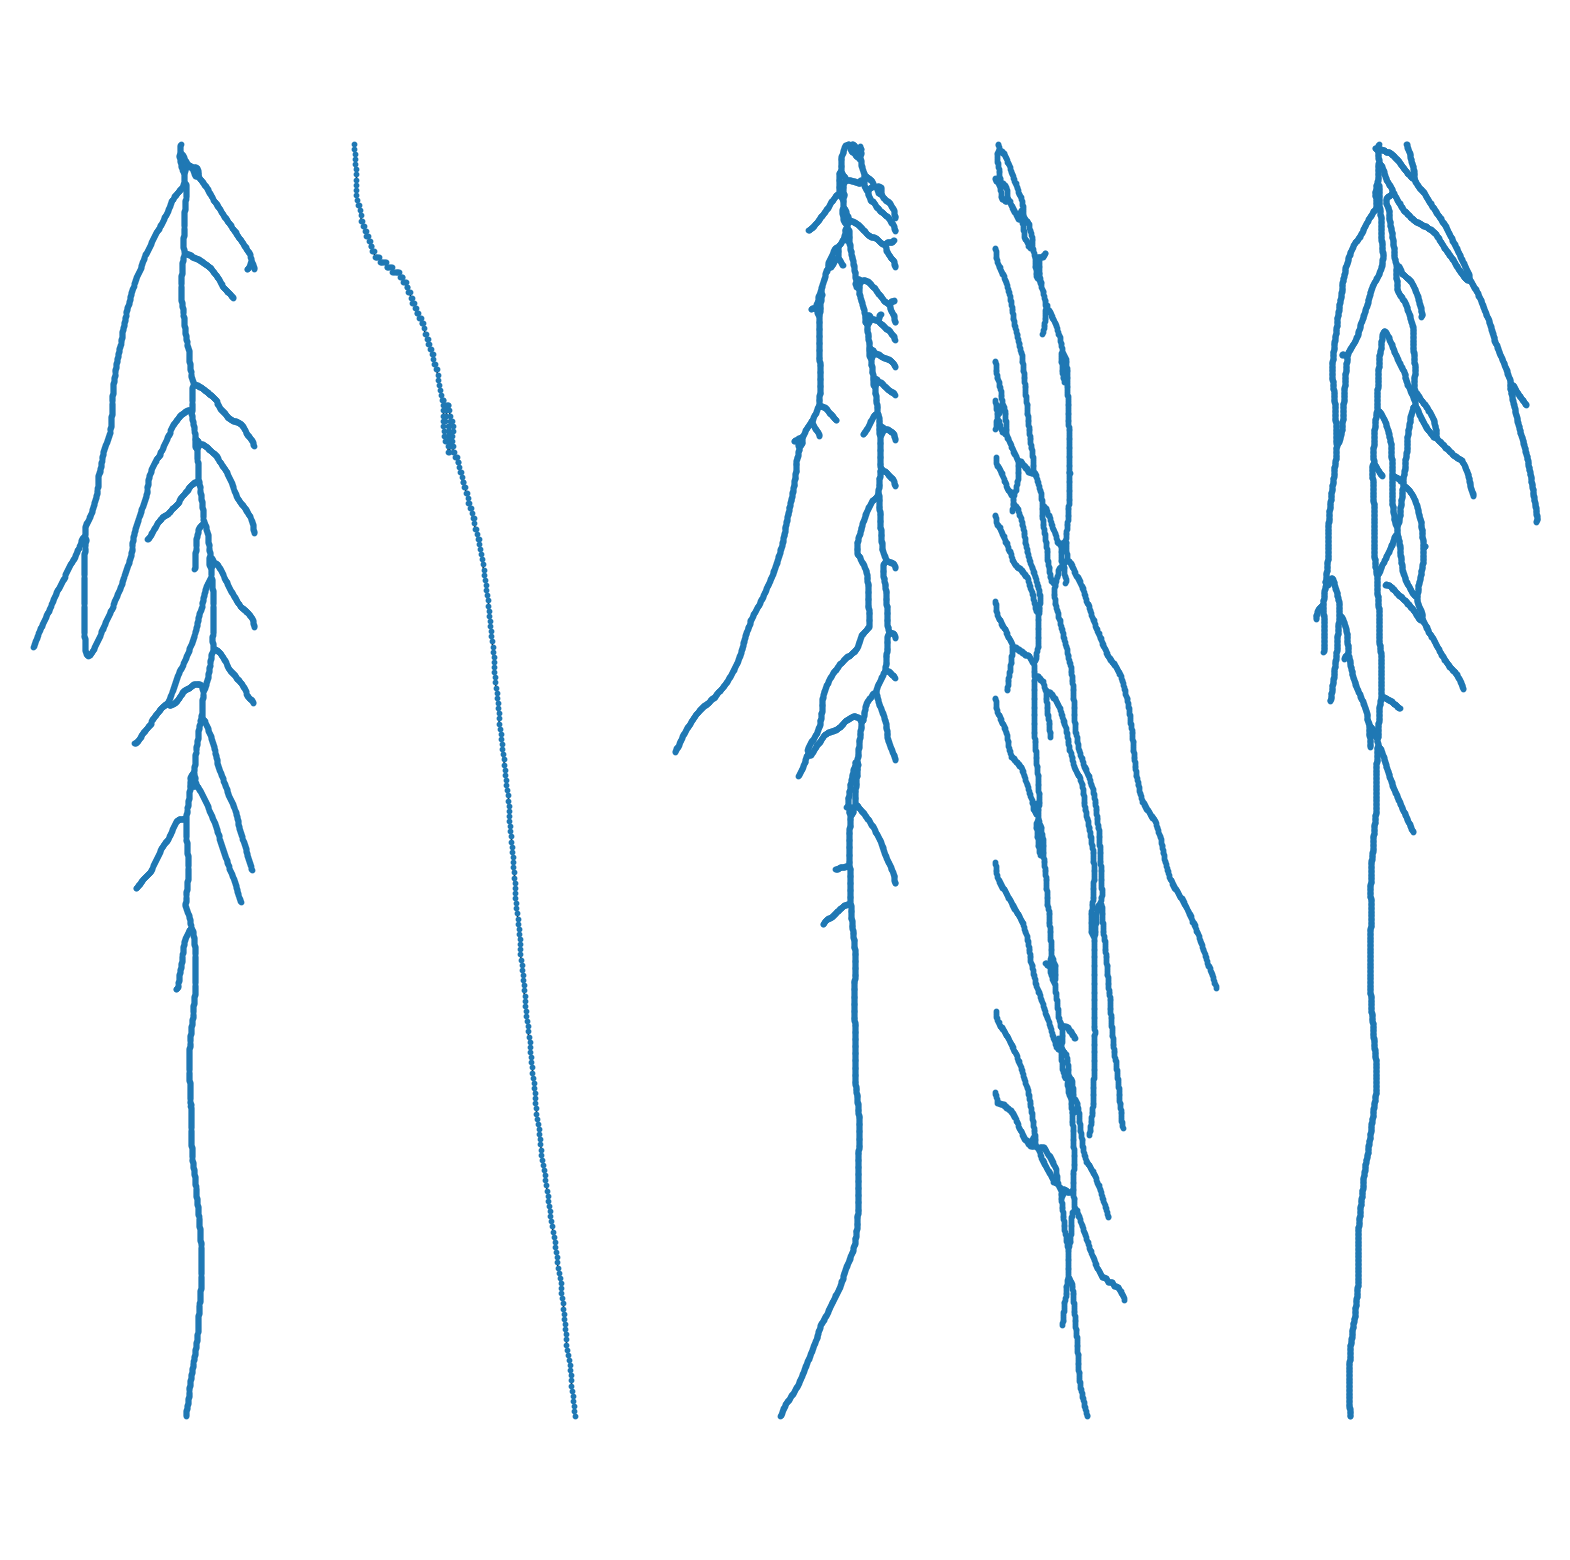

In [5]:
import networkx as nx
def plot_graphs(graphs):
    fig, axes = plt.subplots(1, len(graphs), figsize=(20, 20))
    for ax, (graph, coordinates) in zip(axes, graphs):
        G = nx.from_scipy_sparse_array(graph)
        pos = {i: (coordinates[1][i], -coordinates[0][i]) for i in range(len(coordinates[0]))}
        nx.draw(G, pos, ax=ax, node_size=10, with_labels=False)
        ax.axis('off')
    plt.show()

# calling the function
plot_graphs(graphs)


In [6]:
# creating Skeleton objects for all skeletonized images
def analyze_skeletons(skeletonized_images):
    skeleton_objects = []
    for skel_img in skeletonized_images:
        if skel_img.any():  # cheking if the skeletonized image is not empty
            skeleton_objects.append(Skeleton(skel_img))
        else:
            skeleton_objects.append(None)

    for i, skeleton in enumerate(skeleton_objects):
        if skeleton is not None:
            branch_data = summarize(skeleton)
            n_endpoints = sum(branch_data['branch-type'] == 1)
            print(f"Skeleton {i+1}:")
            print(f"  Number of branches: {skeleton.n_paths}")
            print(f"  Number of endpoints: {n_endpoints}")
        else:
            print(f"Skeleton {i+1}: Empty or invalid skeleton image")

    return skeleton_objects

# calling the function
skeleton_objects = analyze_skeletons(skeletonized_images)

C:\Users\victo\AppData\Local\Temp\ipykernel_8180\2832510959.py:12: VisibleDeprecationWarning: separator in column name will change to _ in version 0.13; to silence this warning, use `separator='-'` to maintain current behavior and use `separator='_'` to switch to the new default behavior.
  branch_data = summarize(skeleton)


Skeleton 1:
  Number of branches: 65
  Number of endpoints: 22
Skeleton 2:
  Number of branches: 21
  Number of endpoints: 9
Skeleton 3:
  Number of branches: 188
  Number of endpoints: 52
Skeleton 4:
  Number of branches: 162
  Number of endpoints: 42
Skeleton 5:
  Number of branches: 93
  Number of endpoints: 26


C:\Users\victo\AppData\Local\Temp\ipykernel_8180\2832510959.py:12: VisibleDeprecationWarning: separator in column name will change to _ in version 0.13; to silence this warning, use `separator='-'` to maintain current behavior and use `separator='_'` to switch to the new default behavior.
  branch_data = summarize(skeleton)


So, this is the branch data: 

In [7]:
branch_data = summarize(skeleton_objects[0])
branch_data

C:\Users\victo\AppData\Local\Temp\ipykernel_8180\306073743.py:1: VisibleDeprecationWarning: separator in column name will change to _ in version 0.13; to silence this warning, use `separator='-'` to maintain current behavior and use `separator='_'` to switch to the new default behavior.
  branch_data = summarize(skeleton_objects[0])


,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
0,0,0,10,9.414214,1,1.0,0.0,521,392,530,391,521,392,530,391,9.055385
1,0,10,83,25.142136,2,1.0,0.0,530,391,549,399,530,391,549,399,20.615528
2,0,10,38,19.727922,2,1.0,0.0,530,391,542,404,530,391,542,404,17.691806
3,0,38,49,9.414214,2,1.0,0.0,542,404,543,413,542,404,543,413,9.055385
4,0,38,83,9.071068,2,1.0,0.0,542,404,549,399,542,404,549,399,8.602325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,0,2777,2887,34.727922,2,1.0,0.0,1141,411,1172,402,1141,411,1172,402,32.280025
61,0,2887,3175,133.752309,1,1.0,0.0,1172,402,1240,297,1172,402,1240,297,125.095963
62,0,2887,3232,116.526912,2,1.0,0.0,1172,402,1279,413,1172,402,1279,413,107.563934
63,0,3232,3351,74.183766,1,1.0,0.0,1279,413,1337,381,1279,413,1337,381,66.241981


I will create now a list out of "node-id-src" and "node-id-dst", that is going ot be called "nodes":

In [8]:
nodes = list(branch_data["node-id-src"]) + list(branch_data["node-id-dst"])
nodes

[0,
 10,
 10,
 38,
 38,
 49,
 49,
 62,
 63,
 66,
 66,
 83,
 85,
 86,
 86,
 87,
 90,
 95,
 105,
 123,
 123,
 373,
 373,
 438,
 438,
 755,
 755,
 885,
 885,
 1034,
 1034,
 1064,
 1064,
 1107,
 1256,
 1256,
 1512,
 1512,
 1591,
 1706,
 1706,
 1747,
 1747,
 1782,
 1837,
 1837,
 2256,
 2256,
 2464,
 2464,
 2526,
 2580,
 2580,
 2586,
 2586,
 2587,
 2739,
 2739,
 2774,
 2774,
 2777,
 2887,
 2887,
 3232,
 3232,
 10,
 83,
 38,
 49,
 83,
 63,
 53,
 63,
 66,
 87,
 95,
 123,
 86,
 87,
 91,
 105,
 95,
 105,
 438,
 1591,
 373,
 589,
 755,
 485,
 487,
 1090,
 885,
 1591,
 1034,
 1107,
 1064,
 1580,
 1107,
 1256,
 1616,
 1512,
 1795,
 1706,
 2244,
 1782,
 1747,
 2152,
 1782,
 1837,
 2526,
 2256,
 2531,
 2464,
 2526,
 2580,
 2676,
 2586,
 2587,
 2587,
 2739,
 3110,
 2777,
 2774,
 3204,
 2777,
 2887,
 3175,
 3232,
 3351,
 3766]

By creating that list I helped myself now, because I will just find the min() and max().

In [9]:
# finding the minimum and maximum of node_pairs
min_node = min(nodes)
max_node = max(nodes)

print("Minimum node:", min_node)
print("Maximum node:", max_node)

Minimum node: 0
Maximum node: 3766


In this case 0 is the top node and 2187 is the bottom node. 

In [10]:
import networkx as nx

# this is how we can convert the output of skan to a NetworkX graph
G = nx.from_pandas_edgelist(
    branch_data, source="node-id-src", target="node-id-dst", edge_attr="branch-distance"
)

In [11]:
G.nodes

NodeView((0, 10, 83, 38, 49, 63, 53, 62, 66, 87, 95, 123, 85, 86, 91, 105, 90, 438, 1591, 373, 589, 755, 485, 487, 1090, 885, 1034, 1107, 1064, 1580, 1256, 1616, 1512, 1795, 1706, 2244, 1782, 1747, 2152, 1837, 2526, 2256, 2531, 2464, 2580, 2676, 2586, 2587, 2739, 3110, 2777, 2774, 3204, 2887, 3175, 3232, 3351, 3766))

In [12]:
G.number_of_nodes()

58

In [13]:
G.number_of_edges()

65

In [14]:
path_list = nx.dijkstra_path(G, min_node, max_node, weight="branch-distance")
path_list

[0,
 10,
 83,
 123,
 373,
 755,
 885,
 1034,
 1107,
 1256,
 1512,
 1706,
 1782,
 1837,
 2256,
 2464,
 2580,
 2586,
 2739,
 2777,
 2887,
 3232,
 3766]

And finally this is the lenght of the longest branch: 

In [15]:
path_len = nx.dijkstra_path_length(
    G, min_node, max_node, weight="branch-distance"
)
path_len

1358.2518754031094

This is the length of the longest primary root: 1457.5310960166885

In [16]:
import networkx as nx

#function to calculate the length of the longest primary root 
def process_data(skeleton_objects):
    branch_data = summarize(skeleton_objects[0])
    nodes = list(branch_data["node-id-src"]) + list(branch_data["node-id-dst"])

    #finding the minimum and maximum of node_pairs
    min_node = min(nodes)
    max_node = max(nodes)

    print("Minimum node:", min_node)
    print("Maximum node:", max_node)

    # converting the output of skan to a NetworkX graph
    G = nx.from_pandas_edgelist(
        branch_data,
        source="node-id-src",
        target="node-id-dst",
        edge_attr="branch-distance",
    )

    G.nodes
    G.number_of_nodes()
    G.number_of_edges()

    path_list = nx.dijkstra_path(G, min_node, max_node, weight="branch-distance")
    path_len = nx.dijkstra_path_length(G, min_node, max_node, weight="branch-distance")

    return branch_data, G, path_list, path_len

In [17]:
branch_data, G, path_list, path_len = process_data(skeleton_objects)
print("Path list nodes:", path_list)
print("Longest primary root legth:", path_len)

Minimum node: 0
Maximum node: 3766
Path list nodes: [0, 10, 83, 123, 373, 755, 885, 1034, 1107, 1256, 1512, 1706, 1782, 1837, 2256, 2464, 2580, 2586, 2739, 2777, 2887, 3232, 3766]
Longest primary root legth: 1358.2518754031094


C:\Users\victo\AppData\Local\Temp\ipykernel_8180\2540774408.py:5: VisibleDeprecationWarning: separator in column name will change to _ in version 0.13; to silence this warning, use `separator='-'` to maintain current behavior and use `separator='_'` to switch to the new default behavior.
  branch_data = summarize(skeleton_objects[0])


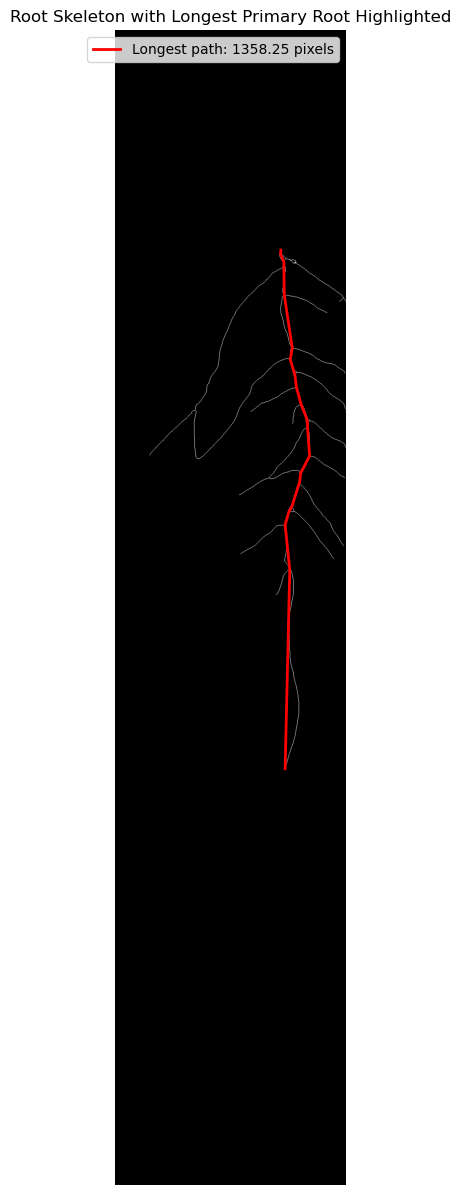

In [18]:
# plotting the image showing the longest primary root

plt.figure(figsize=(10, 15))

# getting the first skeletonized image (the one we analyzed)
skel_img = skeletonized_images[0]

# plotting the skeleton in gray
plt.imshow(skel_img, cmap="gray")

# getting coordinates for the path
path_coords = np.array(
    [
        (
            branch_data.loc[branch_data["node-id-src"] == node, "coord-src-0"].iloc[0],
            branch_data.loc[branch_data["node-id-src"] == node, "coord-src-1"].iloc[0],
        )
        for node in path_list[:-1]
    ]
)  # excluding last node to avoid duplicates

# adding the last point
path_coords = np.vstack(
    [
        path_coords,
        [
            branch_data.loc[
                branch_data["node-id-dst"] == path_list[-1], "coord-dst-0"
            ].iloc[0],
            branch_data.loc[
                branch_data["node-id-dst"] == path_list[-1], "coord-dst-1"
            ].iloc[0],
        ],
    ]
)

# plotting the path of the root in red
plt.plot(
    path_coords[:, 1],
    path_coords[:, 0],
    "r-",
    linewidth=2,
    label=f"Longest path: {path_len:.2f} pixels",
)

plt.legend()
plt.axis("off")
plt.title("Root Skeleton with Longest Primary Root Highlighted")
plt.show()